In [42]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [43]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [44]:
len(paths)

2800

In [45]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [46]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [47]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

df

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear
...,...,...
2795,/kaggle/input/toronto-emotional-speech-set-tes...,ps
2796,/kaggle/input/toronto-emotional-speech-set-tes...,ps
2797,/kaggle/input/toronto-emotional-speech-set-tes...,ps
2798,/kaggle/input/toronto-emotional-speech-set-tes...,ps


In [48]:
df['label'].value_counts()

label
fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: count, dtype: int64

In [49]:
ll = df['label'].value_counts()

px.bar(ll, x=ll.index, y=ll.values, color=ll.index)

In [50]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

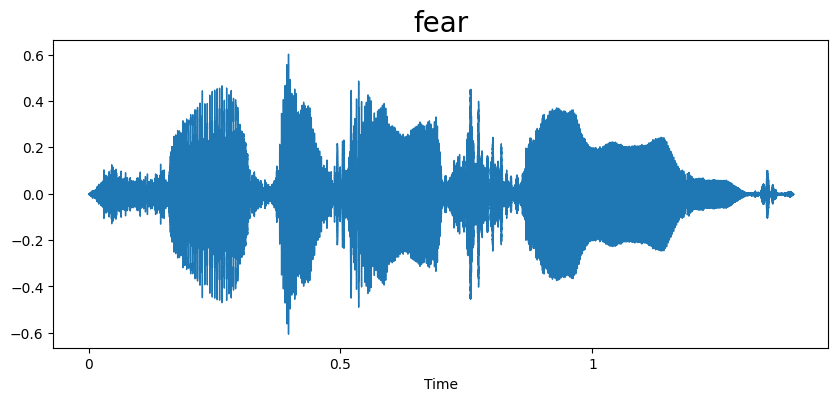

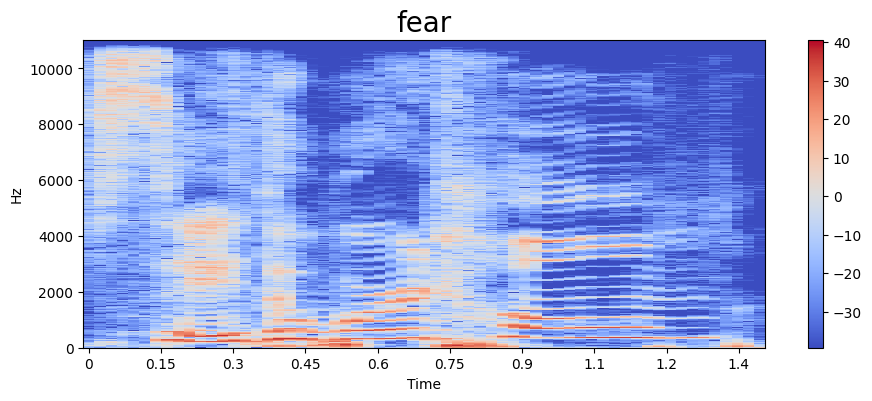

In [51]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

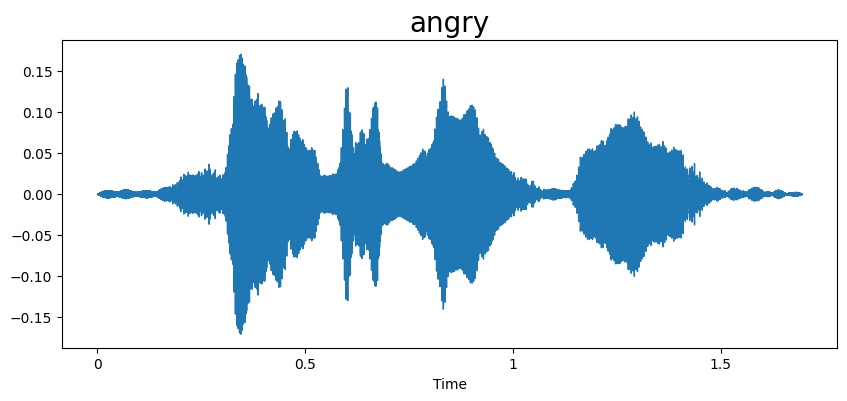

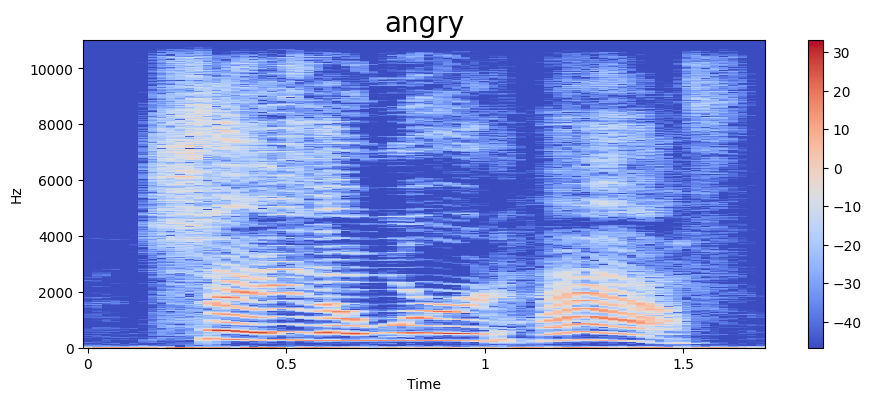

In [52]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

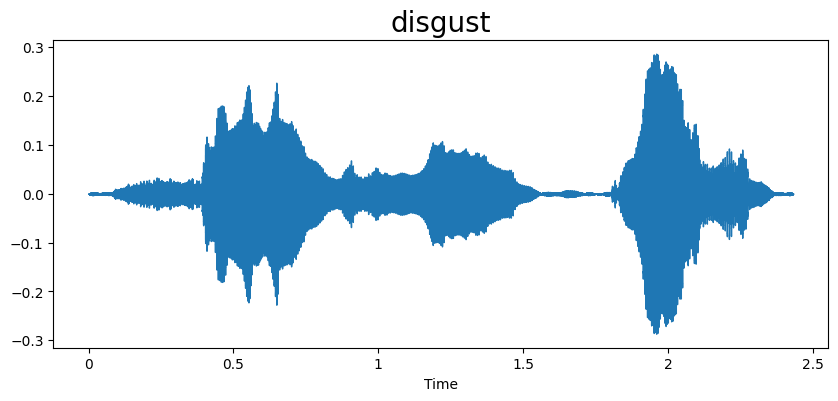

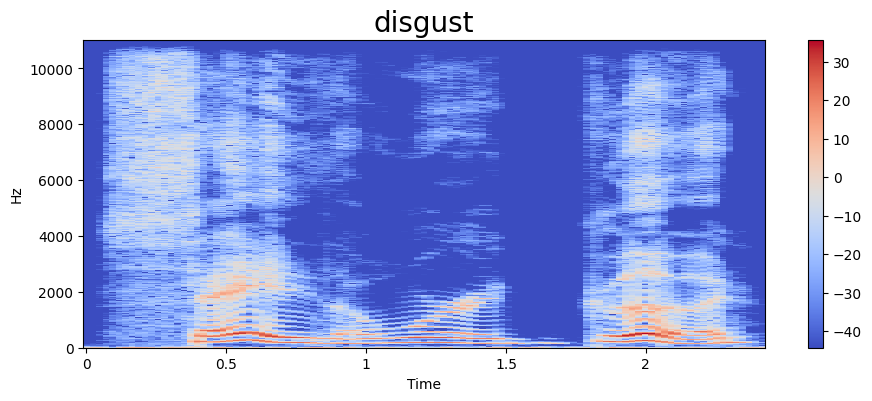

In [53]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

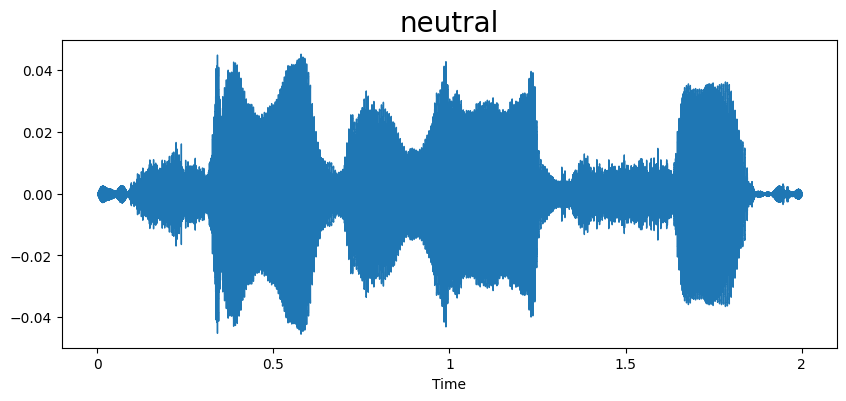

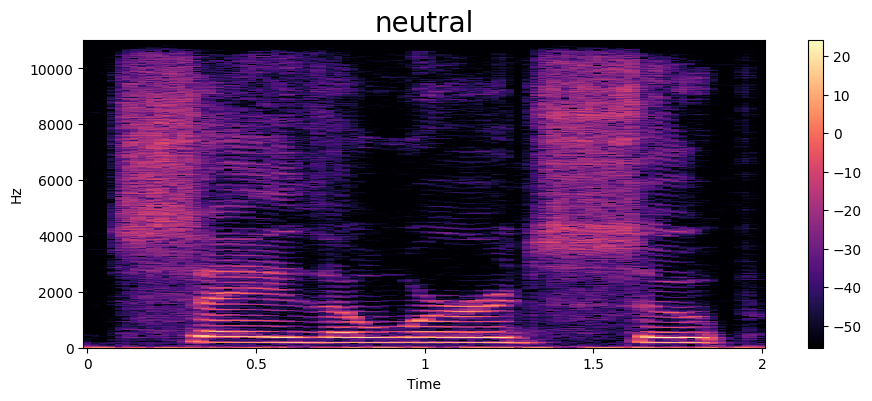

In [54]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

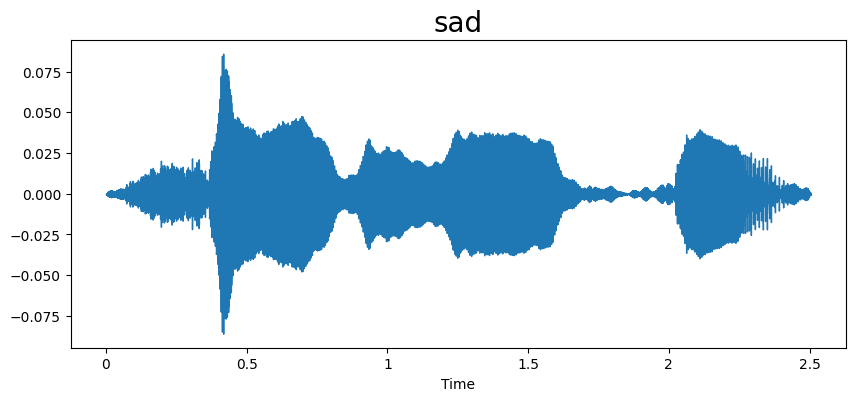

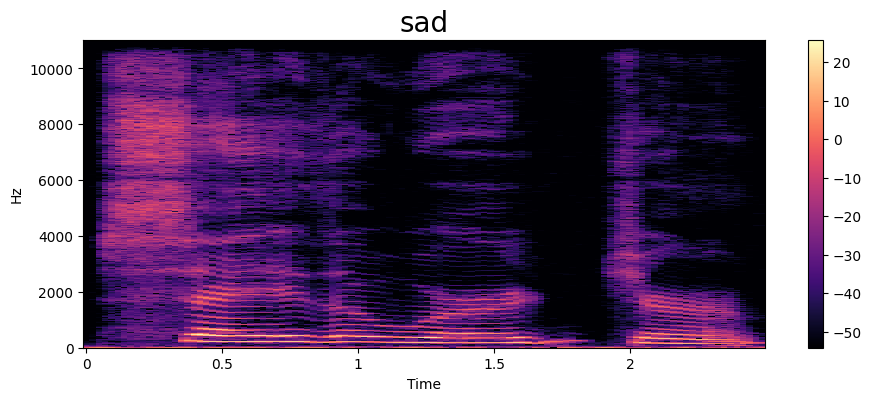

In [55]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

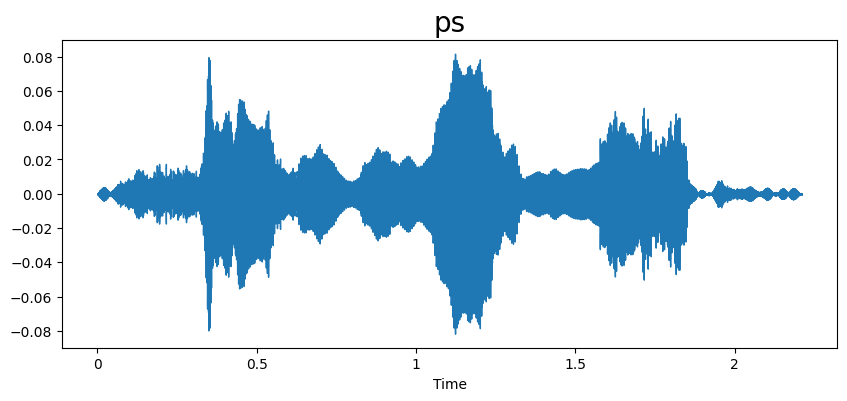

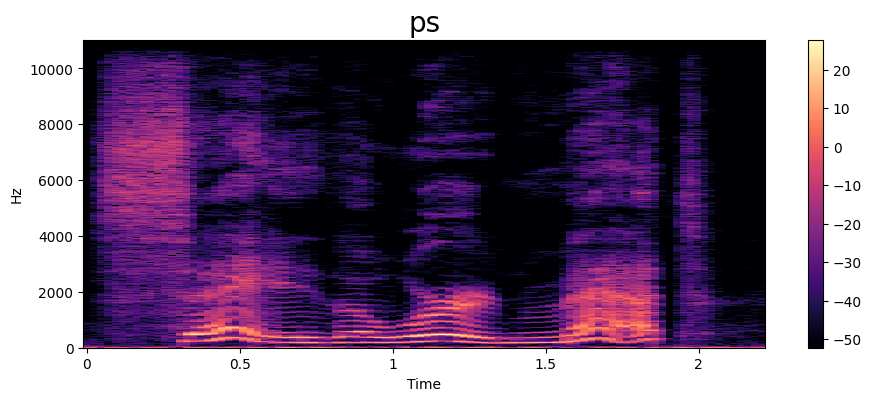

In [56]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

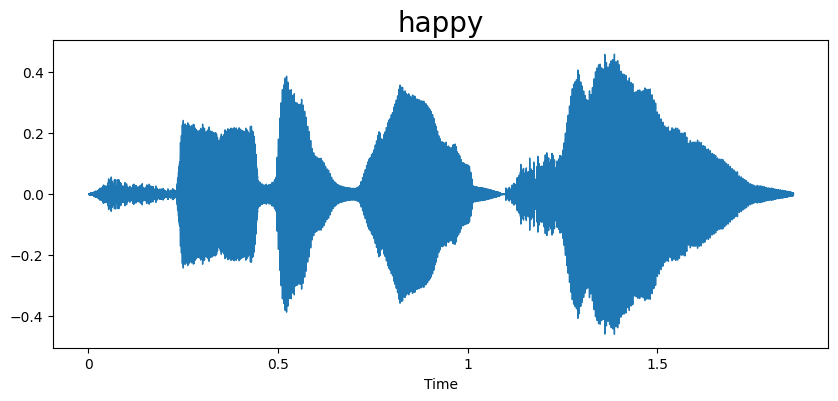

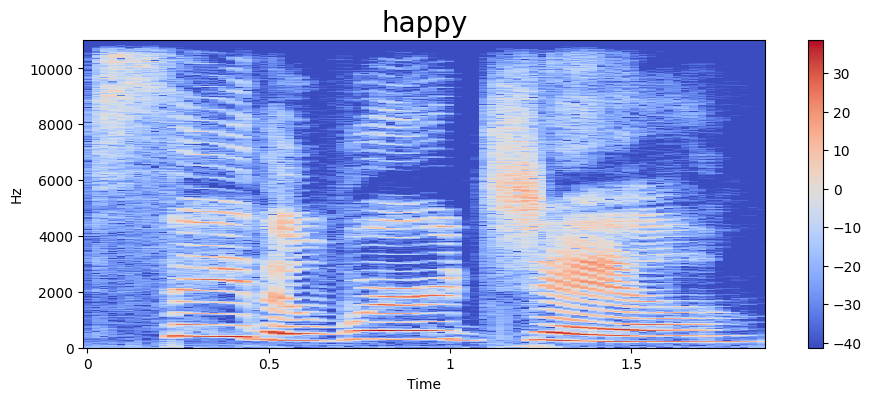

In [57]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [58]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [59]:
extract_mfcc(df['speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689117,   22.12553  ,
        -14.757398 ,   11.051346 ,   12.412449 ,   -3.000262 ,
          1.0844989,   11.078273 ,  -17.41966  ,   -8.093215 ,
          6.5879726,   -4.2209525,   -9.15508  ,    3.5214806,
        -13.186379 ,   14.078851 ,   19.66973  ,   22.725618 ,
         32.57464  ,   16.325035 ,   -3.8427284,    0.896297 ,
        -11.239262 ,    6.653461 ,   -2.5883696,   -7.7140164,
        -10.941657 ,   -2.4007547,   -5.2812862,    4.2711573,
        -11.202218 ,   -9.024621 ,   -3.6669848,    4.869744 ,
         -1.6027985,    2.5600514,   11.454374 ,   11.233451 ],
      dtype=float32)

In [60]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

X_mfcc

0       [-285.73727, 85.78295, -2.1689117, 22.12553, -...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
2795    [-374.3952, 60.864998, 0.025058968, 8.431058, ...
2796    [-313.96478, 39.847843, -5.6493053, -3.8675754...
2797    [-357.54886, 77.88605, -15.224756, 2.194633, -...
2798    [-353.1474, 101.68391, -14.175898, -12.037377,...
2799    [-389.4595, 54.042767, 1.3469982, -1.4258989, ...
Name: speech, Length: 2800, dtype: object

In [61]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [62]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [63]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [64]:
y = y.toarray()

y.shape

(2800, 7)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras import Sequential

model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True), input_shape=(40, 1)),
    Dropout(0.5),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

lr_scheduler = LearningRateScheduler(lr_schedule)

In [69]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [70]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[lr_scheduler, early_stopping, model_checkpoint])

Epoch 1/100
28/28 [==============================] - 15s 352ms/step - loss: 1.7792 - accuracy: 0.2879 - val_loss: 1.2116 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - 8s 280ms/step - loss: 1.2422 - accuracy: 0.5190 - val_loss: 0.7178 - val_accuracy: 0.8058 - lr: 9.0000e-04
Epoch 3/100
28/28 [==============================] - 8s 279ms/step - loss: 0.8475 - accuracy: 0.6825 - val_loss: 0.3877 - val_accuracy: 0.8817 - lr: 8.1000e-04
Epoch 4/100
28/28 [==============================] - 8s 288ms/step - loss: 0.5242 - accuracy: 0.8209 - val_loss: 0.3051 - val_accuracy: 0.8862 - lr: 7.2900e-04
Epoch 5/100
28/28 [==============================] - 8s 277ms/step - loss: 0.4152 - accuracy: 0.8605 - val_loss: 0.1384 - val_accuracy: 0.9464 - lr: 6.5610e-04
Epoch 6/100
28/28 [==============================] - 8s 278ms/step - loss: 0.3343 - accuracy: 0.8901 - val_loss: 0.2606 - val_accuracy: 0.9286 - lr: 5.9049e-04
Epoch 7/100
28/28 [========================

In [71]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_loss}')


18/18 [==============================] - 2s 57ms/step - loss: 0.0689 - accuracy: 0.9804
Testing Accuracy: 0.9803571701049805
Testing Loss: 0.06892335414886475


In [72]:
import keras

# Load the saved model (if needed)
loaded_model = keras.models.load_model('best_model.h5')

# Test the model with another audio file
def predict_emotion(audio_path, model):
    data, sampling_rate = librosa.load(audio_path)
    mfcc = extract_mfcc(audio_path)
    mfcc = np.expand_dims(mfcc, axis=0)
    mfcc = np.expand_dims(mfcc, axis=-1)

    # Predict emotion
    predictions = loaded_model.predict(mfcc)

    # Decode one-hot encoded prediction
    predicted_label = enc.inverse_transform(predictions)[0][0]

    # Display the result
    return f"The predicted emotion for the audio file is: '{predicted_label}'"

# Replace 'path_to_test_audio.wav' with the path to your test audio file
test_audio_path = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav'

predict_emotion(test_audio_path, model)

1/1 [==============================] - 1s 1s/step


"The predicted emotion for the audio file is: 'fear'"

In [73]:
import pickle

with open('Encoder.pkl', 'wb') as f:
    pickle.dump(enc, f)